In [22]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import time

In [23]:
#Power iteration based eigenvector solver
def powerMethodBase(T, max_iter=10000, tol=1.0e-6):
  N = T.shape[0]
  x = np.full((N), 1/N)
  err=0
  #Most Basic Power iteration method
  for _ in range(max_iter):
      xlast = x
      x = np.matmul(x,T)
      x = x/np.linalg.norm(x)
      x = np.asarray(x)
      
      error = abs(x-xlast)
      err = np.sum(error)
      if err < N*tol:
        x = x / np.sum(x)
        return x
  print(f"Power iteration method can not converge in {max_iter} iterations")
  return 0

In [24]:
#Linear Equation based eigenvector solver
def linearEquations(A):
 n = A.shape[1]
 _,v = np.linalg.eig(A)
 ans = abs(np.real(v[:n,0])/np.linalg.norm(v[:n,0],1))
 if(ans.ndim > 1):
     return np.concatenate( ans, axis=1 )
 return ans

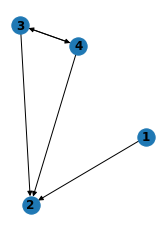

In [25]:
#Creating a doubly linked list graph
G = nx.DiGraph()

n = int(input("Enter no. of nodes in graph: "))
for i in range(1,n+1):
  G.add_node(i)
n_edges = int(input("Enter no. of edges in graph: "))
for i in range(0,n_edges):
  from_node, to_node = map(int, input("Enter from node and to node to add edge: ").split())
  G.add_edge(from_node, to_node)
  
# n = 4
# for i in range(1,n+1):
#   G.add_node(i)
# for i in range(1,n):
#   G.add_edge(i,i+1)
#   G.add_edge(i+1,i)
# G=nx.barabasi_albert_graph(10,5)
if not G.is_directed():
   G = G.to_directed()
#Plot the graph
N = G.number_of_nodes()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')

In [26]:
#Process the graph into a transition matrix
#Creating adjacency matrix, and with that the transition matrix

# T = A/A.sum(axis=1)

# # Creating transition matrix based on teleportation parameter
# n = T.shape[1]

# there the example used 0.4 as alpha the damping factor
# teleportation probability to other random node, 1-m is also called the damping factor
# m=0.15;1-m=0.85 is used by google pagerank.

# S = np.ones((n,n))/n
# T_teleported = (1-m)*T+m*S

#Adjacency matrix
A = nx.to_numpy_matrix(G)

m=0.1
S = np.ones((n,n))/n

#Teleported matrix
A_teleported = (1-m)*A+m*S

In [27]:
#Solving the problem with various methods
x1 = np.asarray(powerMethodBase(A,1000))
x2 = np.asarray(powerMethodBase(A_teleported,1000))
x3 = np.asarray(linearEquations(A))
x4 = np.asarray(linearEquations(A_teleported))

x_dict={}
sorted_vals={}
print("\nResult by power iteraton without teleportation:")
if x1.any():
    x_dict.clear()
    sorted_vals.clear()
    for i in range(0,len(x1[0])):
        x_dict[i+1] = float("{:.5f}".format(x1[0][i]))
    sorted_vals = dict(sorted(x_dict.items(), key=lambda item: item[1], reverse=True))
    print(sorted_vals)
        #print(f"Page {i} has rank: {x1[0][i]}")
print("\nResult by power iteraton with teleportation=0.1:")
if x2.any():
    x_dict.clear()
    sorted_vals.clear()
    for i in range(0,len(x2[0])):
        x_dict[i+1] = float("{:.5f}".format(x2[0][i]))
        #print(f"Page {i} has rank: {x2[0][i]}")
    sorted_vals = dict(sorted(x_dict.items(), key=lambda item: item[1], reverse=True))
    print(sorted_vals)
print("\nResult by equation solving without teleportation:")
if x3.any():
    x_dict.clear()
    sorted_vals.clear()
    for i in range(0,len(x3[0])):
        x_dict[i+1] = float("{:.5f}".format(x3[0][i]))
        # print(f"Page {i} has rank: {x3[0][i]}")
    sorted_vals = dict(sorted(x_dict.items(), key=lambda item: item[1], reverse=True))
    print(sorted_vals)
print("\nResult by equation solving with teleportation=0.1:")
if x4.any():
    x_dict.clear()
    sorted_vals.clear()    
    for i in range(0,len(x4[0])):
        x_dict[i+1] = float("{:.5f}".format(x4[0][i]))
        # print(f"Page {i} has rank: {x4[0][i]}")
    sorted_vals = dict(sorted(x_dict.items(), key=lambda item: item[1], reverse=True))
    print(sorted_vals)


Result by power iteraton without teleportation:
{2: 0.5, 3: 0.25, 4: 0.25, 1: 0.0}

Result by power iteraton with teleportation=0.1:
{2: 0.48626, 3: 0.2444, 4: 0.2444, 1: 0.02494}

Result by equation solving without teleportation:
{3: 0.5, 4: 0.5, 1: 0.0, 2: 0.0}

Result by equation solving with teleportation=0.1:
{1: 0.68304, 2: 0.12934, 3: 0.09381, 4: 0.09381}


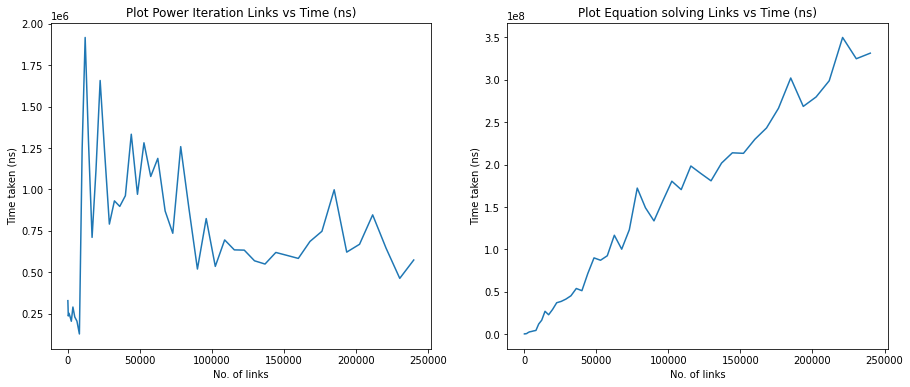

In [28]:
def plot(x,y,y1):
    fig,ax = plt.subplots(1, 2, figsize = (15,6))
    ax[0].plot(x,y)
    ax[0].set_title("Plot Power Iteration Links vs Time (ns)")
    ax[0].set_ylabel("Time taken (ns)")
    ax[1].set_ylabel("Time taken (ns)")

    ax[0].set_xlabel("No. of links")
    ax[1].set_xlabel("No. of links")

    ax[1].plot(x,y1)
    ax[1].set_title("Plot Equation solving Links vs Time (ns)")
    plt.show()
    
def stressTest(n):
    time_values_power=list()
    time_values_equation=list()
    n_value = [i for i in range(10,n,10)]
    for i in n_value:
        A = np.random.rand(i, i)
        T = A/A.sum(axis=1)

        start_time = time.perf_counter_ns()
        x1 = powerMethodBase(T,1000)
        t1 = time.perf_counter_ns()-start_time
        time_values_power.append(t1)

        start_time = time.perf_counter_ns()
        x2 = linearEquations(T)
        t2 = time.perf_counter_ns()-start_time

        time_values_equation.append(t2)

    n_value = [i ** 2 for i in n_value]
    plot(n_value, time_values_power, time_values_equation)

stressTest(500)